In [25]:
import sys
assert sys.version_info >= (3,12)

In [26]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse('1.0.1')

In [27]:
## let's make all plotting consistent

import matplotlib.pyplot as plt

plt.rc('font',size=12)
plt.rc('axes', labelsize=14, titlesize=12) ## axis X and Y label size and chart titlesize
plt.rc('legend',fontsize=12) ## legend fontsize
plt.rc('xtick', labelsize=12) ## xtick and ytick about showing x and y axis numbers
plt.rc('ytick', labelsize=12)



In [28]:
import numpy as np
np.random.seed(42)

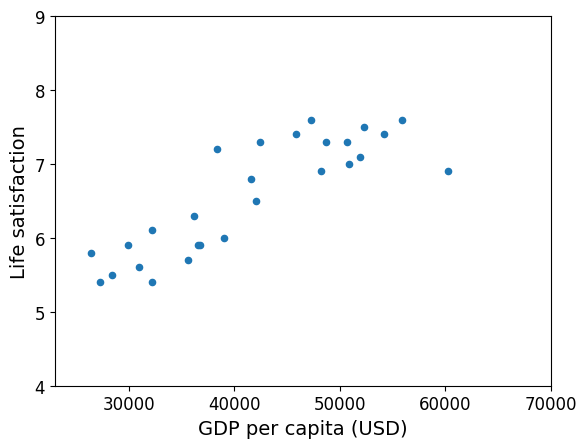

[[6.79955429]]


In [29]:
from sklearn.linear_model import LinearRegression
import pandas as pd

datadf = pd.read_csv('https://github.com/ageron/data/raw/main/lifesat/lifesat.csv')
datadf.plot(kind='scatter',x='GDP per capita (USD)',y='Life satisfaction')
plt.axis([23000, 70000, 4,9])
plt.show()

model = LinearRegression()
model.fit(datadf[['GDP per capita (USD)']].values,datadf[['Life satisfaction']].values)
print(model.predict([[45000]]))


In [30]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=3)
model.fit(datadf[['GDP per capita (USD)']].values,datadf[['Life satisfaction']].values)
print(model.predict([[45000]]))

[[7.43333333]]


In [31]:
## Create a function to save figures

from pathlib import Path

IMG_PATH = Path() / 'images'
IMG_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, resolution=300, fig_extension='png'):
    if tight_layout:
        plt.tight_layout()
    plt.savefig(IMG_PATH/f"{fig_id}.{fig_extension}", format=fig_extension, dpi=resolution)

In [32]:
import urllib.request

datapath = Path() / "datasets" / "lifesat"
datapath.mkdir(parents=True, exist_ok=True)

data_root = "https://github.com/ageron/data/raw/main/"
for filename in ("oecd_bli.csv", "gdp_per_capita.csv"):
    if not (datapath / filename).is_file():
        print("Downloading", filename)
        url = data_root + "lifesat/" + filename
        urllib.request.urlretrieve(url, datapath / filename)

In [33]:
oecd_bli = pd.read_csv(datapath / "oecd_bli.csv")
gdp_per_capita = pd.read_csv(datapath / "gdp_per_capita.csv")

In [34]:
gdp_per_capita = gdp_per_capita[gdp_per_capita['Year'] == 2020]
gdp_per_capita.drop(columns=['Code','Year'],inplace=True)
gdp_per_capita.rename(columns={"Entity":"Country","GDP per capita, PPP (constant 2017 international $)":"GDP Per Capita"},inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
gdp_per_capita.head()

,GDP Per Capita
Country,
Afghanistan,1978.961579
Africa Eastern and Southern,3387.594670
Africa Western and Central,4003.158913
Albania,13295.410885
Algeria,10681.679297


In [35]:
oecd_bli = oecd_bli[oecd_bli['INEQUALITY'] == 'TOT']
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli.head()

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3


In [36]:
oecd_bli.columns

Index(['Air pollution', 'Dwellings without basic facilities',
       'Educational attainment', 'Employees working very long hours',
       'Employment rate', 'Feeling safe walking alone at night',
       'Homicide rate', 'Household net adjusted disposable income',
       'Household net wealth', 'Housing expenditure',
       'Labour market insecurity', 'Life expectancy', 'Life satisfaction',
       'Long-term unemployment rate', 'Personal earnings',
       'Quality of support network', 'Rooms per person',
       'Self-reported health',
       'Stakeholder engagement for developing regulations', 'Student skills',
       'Time devoted to leisure and personal care', 'Voter turnout',
       'Water quality', 'Years in education'],
      dtype='object', name='Indicator')

In [37]:
full_country_stats = pd.merge(gdp_per_capita, oecd_bli, left_index=True, right_index=True)
full_country_stats = full_country_stats[["GDP Per Capita","Life satisfaction"]].sort_values(by=['GDP Per Capita'],ascending=False)

In [38]:
gdppc_col = 'GDP Per Capita'
lifesat_col = 'Life satisfaction'
min_gdp = 23_500
max_gdp = 62_500

country_stats = full_country_stats[(full_country_stats[gdppc_col] >= min_gdp) &
                                   (full_country_stats[gdppc_col] <= max_gdp)]
country_stats.head()

,GDP Per Capita,Life satisfaction
Country,,
United States,60235.728492,6.9
Denmark,55938.212809,7.6
Netherlands,54209.563836,7.4
Iceland,52279.728851,7.5
Austria,51935.603862,7.1


In [39]:
country_stats.to_csv(datapath / "lifesat.csv")
full_country_stats.to_csv(datapath / "lifesat_full.csv")

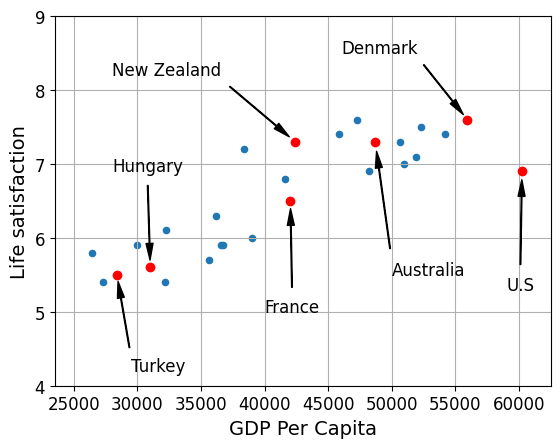

In [40]:
min_life_sat = 4
max_life_sat = 9

position_text = {
    "Turkey": (29_500, 4.2),
    "Hungary": (28_000, 6.9),
    "France": (40_000, 5),
    "New Zealand": (28_000, 8.2),
    "Australia": (50_000, 5.5),
    "United States": (59_000, 5.3),
    "Denmark": (46_000, 8.5)
}

country_stats.plot(kind='scatter',grid=True, x=gdppc_col, y=lifesat_col )

for country, pos_txt in position_text.items():
     pos_data_x = country_stats[gdppc_col].loc[country]
     pos_data_y = country_stats[lifesat_col].loc[country]

     country = "U.S" if country == 'United States' else country
     plt.annotate(country, xy=(pos_data_x, pos_data_y),
                 xytext=pos_txt, fontsize=12,
                 arrowprops=dict(facecolor='black', width=0.5,
                                 shrink=0.08, headwidth=5))
     plt.plot(pos_data_x, pos_data_y, "ro")
plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

# will visit later save_fig('money_happy_scatterplot')
plt.show()    
    


In [41]:
highlighted_countries = country_stats.loc[list(position_text.keys())]
highlighted_countries[[gdppc_col, lifesat_col]].sort_values(by=gdppc_col)

,GDP Per Capita,Life satisfaction
Country,,
Turkey,28384.987785,5.5
Hungary,31007.768407,5.6
France,42025.617373,6.5
New Zealand,42404.393738,7.3
Australia,48697.837028,7.3
Denmark,55938.212809,7.6
United States,60235.728492,6.9


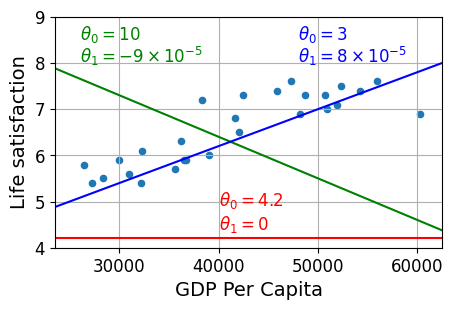

In [42]:
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

X = np.linspace(min_gdp, max_gdp, 1000)

w1, w2 = 4.2, 0
plt.plot(X, w1 + w2 * 1e-5 * X, "r")
plt.text(40_000, 4.9, fr"$\theta_0 = {w1}$", color="r")
plt.text(40_000, 4.4, fr"$\theta_1 = {w2}$", color="r")

w1, w2 = 10, -9
plt.plot(X, w1 + w2 * 1e-5 * X, "g")
plt.text(26_000, 8.5, fr"$\theta_0 = {w1}$", color="g")
plt.text(26_000, 8.0, fr"$\theta_1 = {w2} \times 10^{{-5}}$", color="g")

w1, w2 = 3, 8
plt.plot(X, w1 + w2 * 1e-5 * X, "b")
plt.text(48_000, 8.5, fr"$\theta_0 = {w1}$", color="b")
plt.text(48_000, 8.0, fr"$\theta_1 = {w2} \times 10^{{-5}}$", color="b")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

#save_fig('tweaking_model_params_plot')
plt.show()

In [43]:
from sklearn import linear_model

X_sample = country_stats[[gdppc_col]].values
y_sample = country_stats[[lifesat_col]].values

lin1 = linear_model.LinearRegression()
lin1.fit(X_sample, y_sample)

t0, t1 = lin1.intercept_[0], lin1.coef_.ravel()[0]
print(f"θ0={t0:.2f}, θ1={t1:.2e}")

θ0=3.75, θ1=6.78e-05


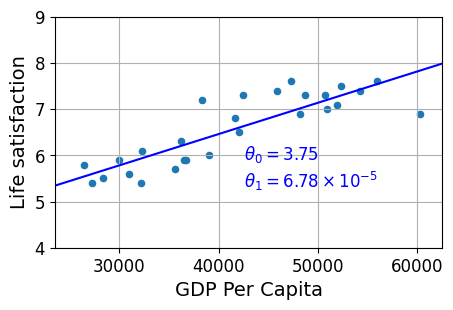

In [44]:
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

X = np.linspace(min_gdp, max_gdp, 1000)
plt.plot(X, t0 + t1 * X, "b")

plt.text(max_gdp - 20_000, min_life_sat + 1.9,
         fr"$\theta_0 = {t0:.2f}$", color="b")
plt.text(max_gdp - 20_000, min_life_sat + 1.3,
         fr"$\theta_1 = {t1 * 1e5:.2f} \times 10^{{-5}}$", color="b")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

#save_fig('best_fit_model_plot')
plt.show()

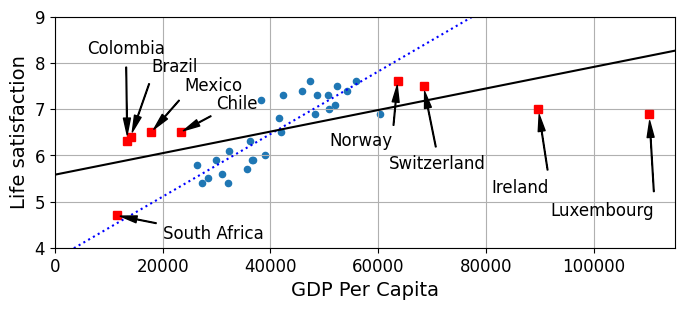

In [45]:
missing_data = full_country_stats[(full_country_stats[gdppc_col] < min_gdp) |
                                  (full_country_stats[gdppc_col] > max_gdp)]

position_text_missing_countries = {
    "South Africa": (20_000, 4.2),
    "Colombia": (6_000, 8.2),
    "Brazil": (18_000, 7.8),
    "Mexico": (24_000, 7.4),
    "Chile": (30_000, 7.0),
    "Norway": (51_000, 6.2),
    "Switzerland": (62_000, 5.7),
    "Ireland": (81_000, 5.2),
    "Luxembourg": (92_000, 4.7),
}

full_country_stats.plot(kind='scatter', figsize=(8, 3),
                        x=gdppc_col, y=lifesat_col, grid=True)

for country, pos_text in position_text_missing_countries.items():
    pos_data_x = missing_data[gdppc_col].loc[country]
    pos_data_y = missing_data[lifesat_col].loc[country]
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text, fontsize=12,
                 arrowprops=dict(facecolor='black', width=0.5,
                                 shrink=0.08, headwidth=5))
    plt.plot(pos_data_x, pos_data_y,'rs')

X = np.linspace(0,115000,1000)
plt.plot(X, t0 + t1*X,'b:')

full_X = full_country_stats[[gdppc_col]].values
full_y = full_country_stats[[lifesat_col]].values

lin_full = LinearRegression()
lin_full.fit(full_X, full_y)

full_t0, full_t1 = lin_full.intercept_[0], lin_full.coef_.ravel()[0]
X = np.linspace(0,115000,1000)
plt.plot(X, full_t0 + full_t1*X,'k-')

plt.axis([0, 115_000, min_life_sat, max_life_sat])

plt.show()


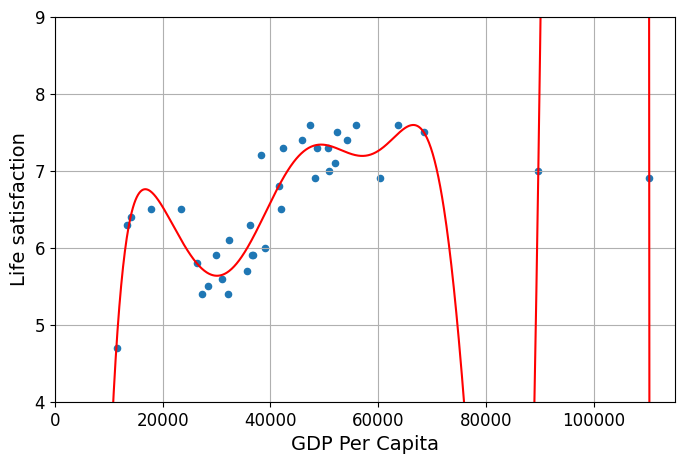

In [48]:
from sklearn import preprocessing
from sklearn import pipeline

full_country_stats.plot(kind='scatter', grid=True, figsize=(8,5), x=gdppc_col, y=lifesat_col)

poly = preprocessing.PolynomialFeatures(degree=10,include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([
    ('poly', poly),
    ('scal', scaler),
    ('lin', lin_reg2)])

pipeline_reg.fit(full_X, full_y)
curve = pipeline_reg.predict(X[:, np.newaxis])
plt.plot(X, curve,'r')

plt.axis([0, 115_000, min_life_sat, max_life_sat])

plt.show()